# <center> Representación de Imágenes en la Computadora y Espacios de Color </center>

La unidad básica de una imagen es el **pixel**. Este representa el nivel de intensidad o color en una ubicación particular de la imagen. Cuando hablamos de **resolución** de la imagen nos referimos al número total de pixeles que la componen. Como las computadoras representan los datos en forma binaria requerimos representar la intensidad o el color de está forma. Para ello, las señales eléctricas capturadas por los sensores son cuantizadas y representadas por un número de bits determinado. El número de bits más común es ocho, el cual tiene la capacidad de representar 255 niveles de intensidad. Entre más alto el número de bits, llamado **profundidad**, podremos representar más amplia gama de intensidades y colores. 

<center>
<figure>
<img src='http://hamamatsu.magnet.fsu.edu/articles/images/digitalimagesfigure1.jpg' width="800"> 
<figcaption><a href="http://hamamatsu.magnet.fsu.edu/articles/digitalimagebasics.html">Imagen Digital</a></figcaption>
</figure>
</center>


Recordemos que usamos el rojo, verde y azul para representar los demás colores, de allí el concepto de **canales**, por ello, si usamos 8 bits usaremos en realidad 24 bits en total por cada pixel. 

En resumen una imagen pude ser descrita matemáticamente como una matriz $X \in [0, 255]^{H \times W \times C}$, donde $H$ es el alto, $W$ el ancho y $C$ los canales.

Cabe mencionar que la anterior descripción es la forma en que nos vamos a encontrar la imagen cuando la queremos procesar (la subimos a RAM), diferente es cuando es almacenada, ya que allí se usan métodos de compresión como PNG y JPEG. 

Alto : 648
Ancho : 1024
Canales : 3


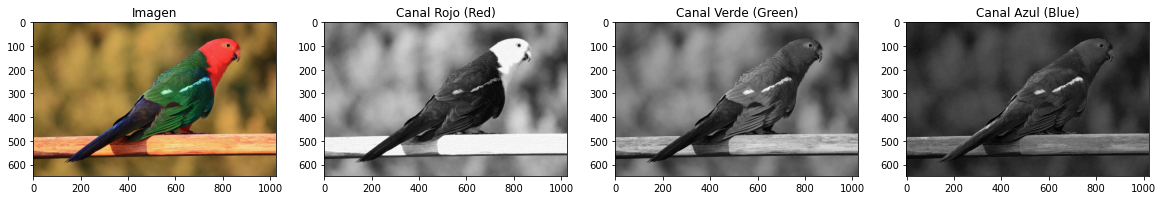

In [20]:
import cv2
import matplotlib.pyplot as plt 


def load_image(path_image):
    img = cv2.imread(path_image)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = load_image('./parrot.jpg')

print(f'Alto : {img.shape[0]}')
print(f'Ancho : {img.shape[1]}')
print(f'Canales : {img.shape[2]}')


plt.figure(figsize=(20,5))

ax = plt.subplot(1,4,1)
ax.imshow(img)
ax.set_title('Imagen')

ax = plt.subplot(1,4,2)
ax.imshow(img[...,0],cmap='gray')
ax.set_title('Canal Rojo (Red)')

ax = plt.subplot(1,4,3)
ax.imshow(img[...,1],cmap='gray')
ax.set_title('Canal Verde (Green)')


ax = plt.subplot(1,4,4)
ax.imshow(img[...,2],cmap='gray')
ax.set_title('Canal Azul (Blue)');

In [2]:
img

array([[[140, 110,  48],
        [141, 111,  49],
        [142, 112,  50],
        ...,
        [ 96,  72,  34],
        [ 95,  71,  33],
        [ 95,  71,  33]],

       [[140, 110,  48],
        [141, 111,  49],
        [142, 112,  50],
        ...,
        [ 94,  70,  32],
        [ 93,  69,  31],
        [ 93,  69,  31]],

       [[141, 111,  49],
        [141, 111,  49],
        [142, 112,  50],
        ...,
        [ 94,  70,  32],
        [ 93,  69,  31],
        [ 93,  69,  31]],

       ...,

       [[101,  77,  29],
        [104,  80,  32],
        [109,  83,  34],
        ...,
        [101,  80,  37],
        [100,  79,  36],
        [ 98,  77,  34]],

       [[103,  76,  29],
        [105,  78,  31],
        [107,  81,  32],
        ...,
        [ 99,  78,  35],
        [100,  79,  36],
        [100,  79,  36]],

       [[104,  77,  30],
        [104,  77,  30],
        [104,  78,  29],
        ...,
        [ 98,  77,  34],
        [100,  79,  36],
        [102,  81,  38]]

In [3]:
img[:3,:3,:]

array([[[140, 110,  48],
        [141, 111,  49],
        [142, 112,  50]],

       [[140, 110,  48],
        [141, 111,  49],
        [142, 112,  50]],

       [[141, 111,  49],
        [141, 111,  49],
        [142, 112,  50]]], dtype=uint8)

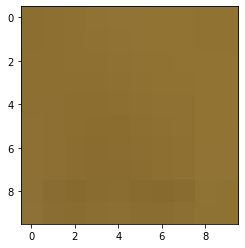

In [4]:
plt.imshow(img[:10,:10,:])

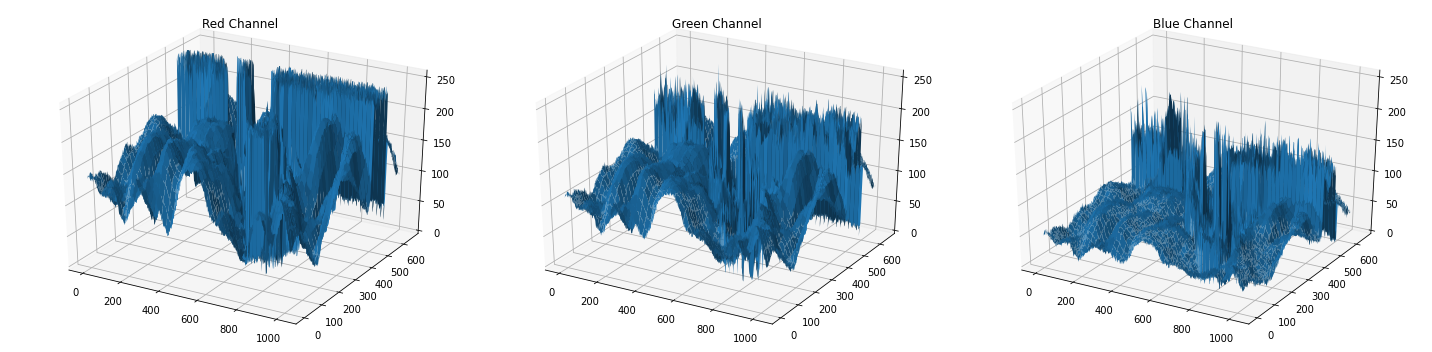

In [5]:
from matplotlib import cm
import numpy as np

fig, ax = plt.subplots(1,3,subplot_kw={"projection": "3d"},figsize=(20,5))

X = np.arange(img.shape[1])
Y = np.arange(img.shape[0])
X, Y = np.meshgrid(X, Y)

Z = img[...,0]
surf = ax[0].plot_surface(X, Y, Z,vmin=0,vmax=255)
ax[0].set_title('Red Channel')

Z = img[...,1]
surf = ax[1].plot_surface(X, Y, Z,vmin=0,vmax=255)
ax[1].set_title('Green Channel')

Z = img[...,2]
surf = ax[2].plot_surface(X, Y, Z,vmin=0,vmax=255)
ax[2].set_title('Blue Channel')

plt.tight_layout()
plt.show()


## Espacios de Color 

Los espacios de color son una representación matemática de un rango de colores. Por rezones histórica, comerciales y prácticas se desarrollaron diferentes modelos de color. 


### Escala de grises 
Imagen representada solo la intensidad luminosa, por ende solo es necesario usar un solo canal.

$X \in [0,255]^{H\times W \times 1}$



<center>
<figure>
<img src='https://i.stack.imgur.com/BJZch.png' width="400"> 
<figcaption>Espacio de escala de grises</figcaption>
</figure>
</center>





### RGB 


Representa los colores usando tres colores primarios rojo, verde y azul. Además este espacio de color es **aditivo**, lo que significa que a más color agregado más longitudes de onda refleja. Generalmente este espacio de color es representado por 8 bits en cada canal, dando un rango de 0 a 255. **Este es el espacio de color más usado.**


<center>
<figure>
<img src='https://www.suntos.com.np/RGB_COLOR.jpg' width="400"> 
<figcaption><a href="https://www.suntos.com.np/computer-vision-for-robotics/what-is-image.html#color-spaces">Espacio de Color RGB</a></figcaption>
</figure>
</center>





### HSV 

Se asemeja más a como los seres humanos percibimos el color. Este espacio de color separa el color del brillo. Para hacer esto tiene tres componentes o canales; color (Hue) expresado en ángulos de 0 a 360 grados, saturación (Saturation) representado por valores de 0 a 100 y brillo (Value) igualmente con valores de 0 a 100. 


<center>
<figure>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/800px-HSV_color_solid_cylinder.png?20151228061406' width="400"> 
<img src='https://www.researchgate.net/profile/Ashu-Marasinghe/publication/283760948/figure/fig1/AS:768088622522369@1560138006616/HSV-System-Components-and-Colors-Selection.png' width="300"> 
<figcaption><a href="https://en.wikipedia.org/wiki/HSV">Espacio de Color HSV</a></figcaption>
</figure>
</center>





### YUV

YUV tiene tres componentes: Y correspondiente al brillo, U (proyección azul) y V (proyección roja) correspondientes a los componentes cromáticos. Fue muy usado para la transmisión en sistemas análogos de televisión.


<center>
<figure>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/YUV_UV_plane.svg/300px-YUV_UV_plane.svg.png' width="400"> 
<figcaption><a href="https://commons.wikimedia.org/wiki/File:HSV_color_solid_cylinder.png">Espacio de Color YUV</a></figcaption>
</figure>
</center>



## Transformación entre espacios de color

### RGB a HSV


$$R = \frac{R}{255} $$

$$G = \frac{G}{255}$$

$$B = \frac{B}{255}$$



Cálculo del Value:

<center>
<figure>
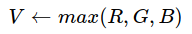 
</figure>
</center>




Cálculo de la Saturación:


<center>
<figure>
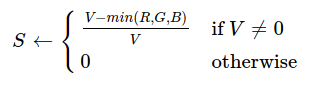 
</figure>
</center>

 

Cálculo del Hue:

<center>
<figure>
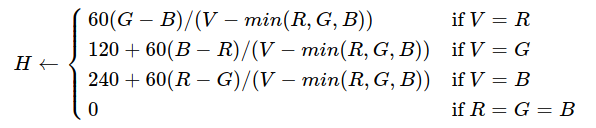 
</figure>
</center>

$$ H = H + 360 \ \ \ \text{if} \ H < 0$$



* Investigar el espacio de color CMYK


**Ejemplo con captura de la cámara**